In [1]:
from aitextgen.TokenDataset import TokenDataset
from aitextgen.tokenizers import train_tokenizer
from aitextgen.utils import GPT2ConfigCPU
from aitextgen import aitextgen

In [44]:
fp = '/Users/alexander.fioto/Models/Labeled-Seinfeld-Model/' 

In [48]:
ai = aitextgen(model= fp + "pytorch_model.bin",
               config = fp + 'config.json', 
               vocab_file=fp + 'aitextgen-vocab.json',
               merges_file=fp + 'aitextgen-merges.txt')

INFO:aitextgen:Loading GPT-2 model from provided /Users/alexander.fioto/Models/Labeled-Seinfeld-Model/pytorch_model.bin.
INFO:aitextgen:Using a custom tokenizer.


In [108]:
ai.generate(prompt='ALEX: tell me about yourself',
            temperature = .01)

ALEX: tell me about yourself.


JERRY: What?


GEORGE: You're going to get me a sample of Jerry


In [181]:
class SeinfeldChatbot():
    def __init__(self, name=None, fp='/Users/alexander.fioto/Models/Labeled-Seinfeld-Model/', temperature = .4):
        self.user_name_title = name
        self.total_input_text = []
        self.name = name
        self.fp = fp
        self.temperature = temperature
        self.exit_commands = ['bye', 'exit', 'i have to go', 'later', 'gtg', 'stop', 'end']
        self.punctuation = ['.', '!', '?']
        self.model = aitextgen(model= fp + "pytorch_model.bin",
                               config = fp + 'config.json', 
                               vocab_file=fp + 'aitextgen-vocab.json',
                               merges_file=fp + 'aitextgen-merges.txt')
        print("Model Loaded!")
        
    
    def change_temp(self, temp):
        if temp < 0 or temp > 1:
            raise ValueError('Value must be greater than 0 and less than or equal to 1')
        else:
            self.temperature = temp
        
        
    def get_name(self):
        self.name = input("GEORGE: What\'s your name, pal?")
        self.user_name_title = self.name.upper() + ': '
    
    def chat(self):
        if not self.name:
            self.get_name()
            print(f'JERRY: What do you want, {self.name}?')
            chat = True
            while chat:
                text_input = input()
                if text_input in self.exit_commands:
                    chat = False
                    print('KRAMER: Who turns down a junior mint?')

                else:
                    self.total_input_text.append(text_input)
                    if text_input[-1] not in self.punctuation:
                        text_input += '.'
                    self.model.generate(prompt = f'{self.user_name_title}' + text_input,
                                        temperature = .4)

        else:
            print(f'JERRY: Oh, I see you\'re back again, {self.name}. To what do we owe the pleasure?')
            chat = True
            while chat:
                text_input = input()
                if text_input in self.exit_commands:
                    chat = False
                    print('KRAMER: Who turns down a junior mint?')

                else:
                    self.total_input_text.append(text_input)
                    if text_input[-1] not in self.punctuation:
                        text_input += '.'
                    self.model.generate(prompt = f'{self.user_name_title}' + text_input,
                                        temperature = .4)
    def episode_recommender(self):
        return self.total_input_text

        
        
        

In [182]:
bot = SeinfeldChatbot()

INFO:aitextgen:Loading GPT-2 model from provided /Users/alexander.fioto/Models/Labeled-Seinfeld-Model/pytorch_model.bin.
INFO:aitextgen:Using a custom tokenizer.


Model Loaded!


In [183]:
bot.chat()

GEORGE: What's your name, pal? Dan


JERRY: What do you want, Dan?


 I like to eat poop.


DAN: I like to eat poop.


GEORGE: You know, I'm not really in the mood.


GEORGE:  I


 Dan likes poop.


DAN: Dan likes poop. 


KRAMER:  Hey, Jer.


JERRY: Hi.


KRAMER: Oh, hi


 What are you doing.


DAN: What are you doing.


ELAINE: Oh, I'm so sorry.


GEORGE: I'm sorry it's out of town


 stop


KRAMER: Who turns down a junior mint?


In [185]:
dan_poop = bot.episode_recommender()

In [186]:
dan_poop

['I like to eat poop.', 'Dan likes poop.', 'What are you doing.']

In [198]:
from numpy.random import randn
import matplotlib.pyplot as plt

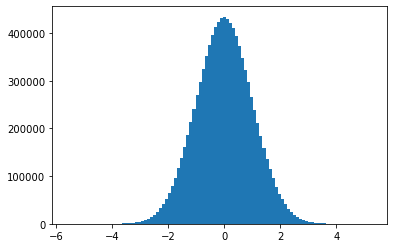

In [202]:
plt.hist(randn(10000000), bins=100);